# **Article Clustering + Recommender System**
## **Free Pass Data Science Basic Computing Community (BCC) 2023**
### Oleh Amira Ghina Nurfansepta (215150201111026)
Proyek ini berisi:
* Data Understanding
* Data Preprocessing
* Exploratory Data Analysis
* Clustering
* Article Recommendations With K-Nearest Neighbor and Cosine Similarity
* Article Recommendations With Content Based
* Deployment
* Result + Conclusion



# 1. Data Understanding
Data Understanding merupakan tahap awal dari proses Data Science. Tujuan dari tahap ini adalah mengumpulkan informasi tentang data yang akan dianalisis. Pada tahap ini, data akan dideskripsikan, dilakukan statistika deskriptif, dan diuji kualitasnya untuk eksplorasi data sehingga dapat mengungkapkan pola dan hubungan yang menarik. 

## Import Library
Library yang digunakan berguna untuk banyak hal, seperti untuk memanipulasi data, mengabaikan peringatan (agar mempercepat proses run), visualisasi, clustering, dan recommendation.

In [1]:
#library umum
import numpy as np
import pandas as pd

#ignore warning
import warnings
warnings.filterwarnings("ignore")

#library visualisasi
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import missingno as msno
from wordcloud import WordCloud

#library clustering
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import linear_kernel

#library recommendation
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from string import punctuation
import string

## Import Dataset
Data yang digunakan dalam proyek ini adalah Dataset Freepass DS 2023.csv dari BCC. Data ini akan diproses dengan metode unsupervised learning karena data yang digunakan tidak diklasifikasi atau diberi label.

In [2]:
df = pd.read_csv('/kaggle/input/dataset-freepass-ds-2023/Dataset Freepass DS 2023.csv', sep=';')
df.columns = ['title', 'link', 'date', 'author', 'abstract']
df[['title', 'link', 'date', 'abstract']] = df[['title', 'link', 'date', 'abstract']].replace(['\t','\n','\r'],'', regex=True)
df['author'] = df['author'].replace(['\t','\r'],'', regex=True)

df.head()

,title,link,date,author,abstract
0,Interactive Mixed Reality System Menggunakan ...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,"DiterbitkanJan 3, 2017","\nAristyo Pramana\n\nFakultas Ilmu Komputer, U...",Teknologi mixed reality akan membuat interaksi...
1,Optimasi Penjadwalan Mata Pelajaran Menggunak...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,"DiterbitkanJan 3, 2017","\nOlive Khoirul L.M.A.\n\nTeknik Informatika, ...",Penjadwalan merupakan salah satu proses pentin...
2,Pengembangan Push Notification Menggunakan We...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,"DiterbitkanJan 3, 2017","\nAndrias Yudianto\n\nTeknik Informatika, Faku...",Untuk memenuhi kebutuhan masyarakat akan keter...
3,Pembangunan Sistem Informasi Manajemen Keluha...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,"DiterbitkanJan 3, 2017","\nAdzanil Rachmadi P\n\nSistem Informasi, Faku...",Perusahaan McDonald’s adalah perusahaan yang b...
4,Implementasi Metode Store and Forward Pada Hy...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,"DiterbitkanJan 3, 2017",\nMuhammad Gigih Wicaksono\n\nTeknik Informati...,Perkembangan internet saat ini sangat pesat. D...


## Informasi Mengenai Dataframe
Berbagai macam informasi, seperti jumlah baris dan kolom, stastika deskriptif, cek kolom dicari untuk memastikan kualitas data.


### Jumlah Baris dan Kolom Dataframe

In [3]:
df.shape

(3479, 5)

### Informasi Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     3479 non-null   object
 1   link      3479 non-null   object
 2   date      3479 non-null   object
 3   author    3479 non-null   object
 4   abstract  3479 non-null   object
dtypes: object(5)
memory usage: 136.0+ KB


### Statistika Deskriptif Dataframe

In [5]:
df.describe()

,title,link,date,author,abstract
count,3479,3479,3479,3479,3479
unique,3479,3479,582,3477,3412
top,Interactive Mixed Reality System Menggunakan ...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,"DiterbitkanAgu 30, 2017",\nAfrizal Aldiansyah Putra\n\nFakultas Ilmu Ko...,Untuk dipublikasikan di Jurnal Teknologi Infor...
freq,1,1,68,2,16


### Cek Kolom Kosong

In [6]:
df.isnull().sum()

title       0
link        0
date        0
author      0
abstract    0
dtype: int64

Text(0.5, 1.0, 'Missing Values of Each Columns')

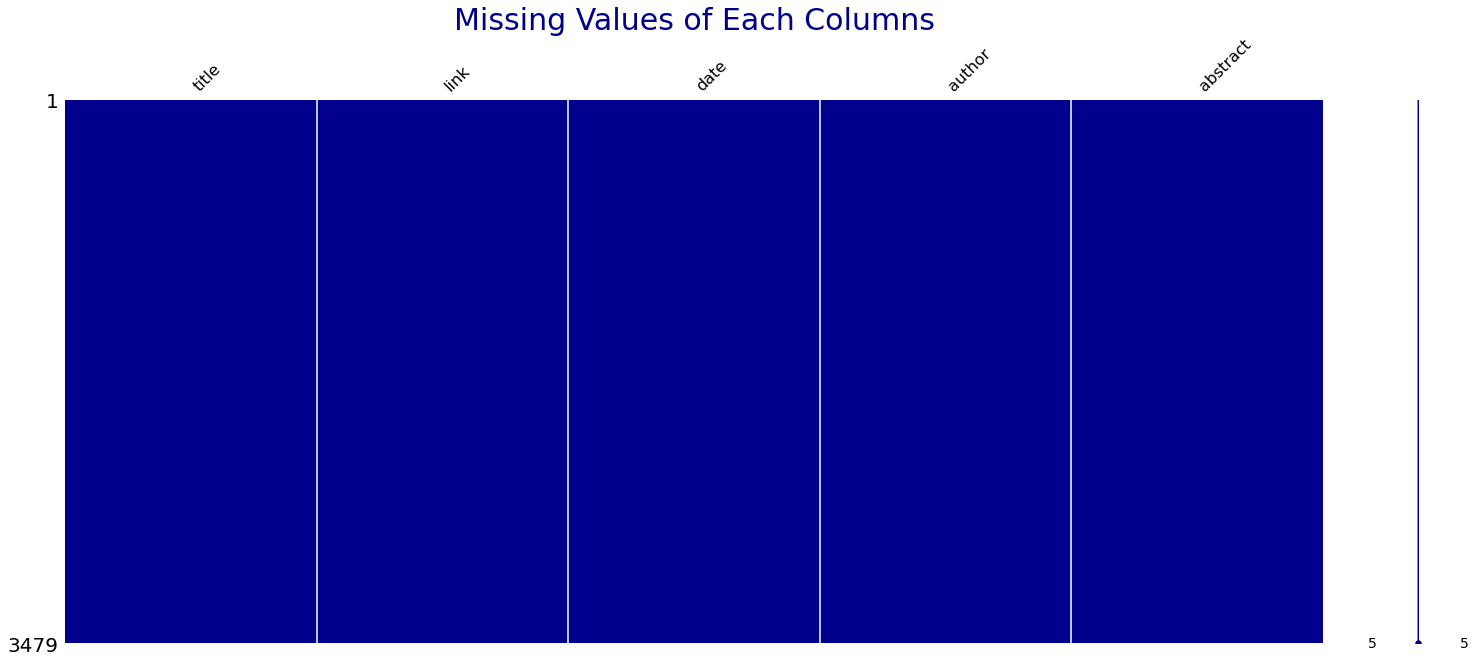

In [7]:
msno.matrix(df,color = (0, 0, 0.55))
plt.title('Missing Values of Each Columns', fontsize=30, color='darkblue')

### Memeriksa Value Count dari Setiap Kolom

In [8]:
for column in df.columns:
    print(df[column].value_counts())

 Interactive Mixed Reality System Menggunakan Pepper Ghost System dan Kendali Gerakan Tangan Berbasis Kinect                                                1
 Prediksi Pertumbuhan Jumlah Penduduk Kota Malang menggunakan Metode Average-based Fuzzy Time Series                                                        1
 Klasifikasi Ulasan Palsu menggunakan MDLText dengan Seleksi Fitur IG dan SMOTE                                                                             1
 Implementasi Monitoring Kualitas Udara Taman di Kota Malang menggunakan Low Power Mode pada Android berbasis Arduino Uno                                   1
 Sistem Pengukur Kesegaran Daging Sapi menggunakan Metode K-Nearest Neighbor (K-NN) dengan Fitur Penambahan Data Latih berbasis EEPROM                      1
                                                                                                                                                           ..
 Implementasi Metode Time Invariant Fuzzy Time Serie

## Insight
Dari bagian Data Understanding, terdapat beberapa hal yang dapat diketahui:
* Tidak ada kolom yang memiliki missing value
* Semua nilai dari setiap kolom bertipe string (object)
* Tipe data pada kolom date harus diubah ke datetime untuk memudahkan proses selanjutnya
* Kolom author harus dipisah untuk memudahkan proses selanjutnya

# 2. Data Preprocessing
Data preprocessing adalah tahap berikutnya dalam proses Data Science. Pada tahap ini, data akan diubah, data yang hilang diisi, data disederhanakan, data disamakan, dan lain sebagainya. Tujuan akhir dari tahap ini adalah untuk mengubah data menjadi sebuah bentuk yang dapat dianalisis dengan mudah.

## Mengubah Kolom Date
Tipe data yang awalnya String akan diubah menjadi Datetime

In [9]:
df['date'] = df['date'].replace(['Diterbitkan', ' '],'', regex=True)

df['date'] = df['date'].apply(lambda x: str(x) if len(x) == 10
                              else str(x)[0:3] + '0' + str(x)[-6:])

months_dict = {
   "Jan":"01",
   "Peb":"02",
   "Mar":"03",
   "Apr":"04",
   "Mei":"05",
   "Jun":"06",
   "Jul":"07",
   "Agu":"08",
   "Sep":"09",
   "Okt":"10",
   "Nov":"11",
   "Des":"12"
}
df['date'] = pd.to_datetime(df['date'].apply(lambda x: str(x)[-4:] + "-" + months_dict[str(x)[:3]] + "-" + str(x)[3:5]))

df.head()

,title,link,date,author,abstract
0,Interactive Mixed Reality System Menggunakan ...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,"\nAristyo Pramana\n\nFakultas Ilmu Komputer, U...",Teknologi mixed reality akan membuat interaksi...
1,Optimasi Penjadwalan Mata Pelajaran Menggunak...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,"\nOlive Khoirul L.M.A.\n\nTeknik Informatika, ...",Penjadwalan merupakan salah satu proses pentin...
2,Pengembangan Push Notification Menggunakan We...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,"\nAndrias Yudianto\n\nTeknik Informatika, Faku...",Untuk memenuhi kebutuhan masyarakat akan keter...
3,Pembangunan Sistem Informasi Manajemen Keluha...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,"\nAdzanil Rachmadi P\n\nSistem Informasi, Faku...",Perusahaan McDonald’s adalah perusahaan yang b...
4,Implementasi Metode Store and Forward Pada Hy...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,\nMuhammad Gigih Wicaksono\n\nTeknik Informati...,Perkembangan internet saat ini sangat pesat. D...


In [10]:
df.dtypes

title               object
link                object
date        datetime64[ns]
author              object
abstract            object
dtype: object

## Mengubah Kolom Author
Kolom Author berisi 6 macam data, yaitu 3 penulis dan 3 institusi dari penulis tersebut.

### Membagi Menjadi Beberapa Kolom

In [11]:
df['author1'] = df['author'].str.split('\n').str[1]
df['institution1'] = df['author'].str.split('\n').str[3]
df['author2'] = df['author'].str.split('\n').str[5]
df['institution2'] = df['author'].str.split('\n').str[7]
df['author3'] = df['author'].str.split('\n').str[9]
df['institution3'] = df['author'].str.split('\n').str[11]

df = df.drop('author', axis=1)
df = df.fillna('Tidak diketahui')

df.head()

,title,link,date,abstract,author1,institution1,author2,institution2,author3,institution3
0,Interactive Mixed Reality System Menggunakan ...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,Teknologi mixed reality akan membuat interaksi...,Aristyo Pramana,"Fakultas Ilmu Komputer, Universitas Brawijaya",Eriq Muh. Adams Jonemaro,"Fakultas Ilmu Komputer, Universitas Brawijaya",Wibisono Sukmo Wardhono,"Fakultas Ilmu Komputer, Universitas Brawijaya"
1,Optimasi Penjadwalan Mata Pelajaran Menggunak...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,Penjadwalan merupakan salah satu proses pentin...,Olive Khoirul L.M.A.,"Teknik Informatika, Fakultas Ilmu Komputer, Un...",Agus Wahyu Widodo,"Fakultas Ilmu Komputer, Universitas Brawijaya",Budi Darma Setiawan,Tidak diketahui
2,Pengembangan Push Notification Menggunakan We...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,Untuk memenuhi kebutuhan masyarakat akan keter...,Andrias Yudianto,"Teknik Informatika, Fakultas Ilmu Komputer, Un...",Eko Sakti Pramukantoro,"Fakultas Ilmu Komputer, Universitas Brawijaya",Kasyful Amron,"Fakultas Ilmu Komputer, Universitas Brawijaya"
3,Pembangunan Sistem Informasi Manajemen Keluha...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,Perusahaan McDonald’s adalah perusahaan yang b...,Adzanil Rachmadi P,"Sistem Informasi, Fakultas Ilmu Komputer, Univ...",Fatwa Ramdani,"Fakultas Ilmu Komputer, Universitas Brawijaya",Retno Indah Rokhmawati,"Fakultas Ilmu Komputer, Universitas Brawijaya"
4,Implementasi Metode Store and Forward Pada Hy...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,Perkembangan internet saat ini sangat pesat. D...,Muhammad Gigih Wicaksono,"Teknik Informatika, Fakultas Ilmu Komputer, Un...",Aswin Suharsono,"Fakultas Ilmu Komputer, Universitas Brawijaya",Adhitya Bhawiyuga,"Fakultas Ilmu Komputer, Universitas Brawijaya"


### Memperbaiki Kolom Institution
Terdapat banyak redundansi data yang ditulis tidak semestinya dalam kolom ini sehingga perlu diperbaiki.

In [12]:
df[['institution1', 'institution2', 'institution3']] = df[['institution1', 'institution2', 'institution3']].replace(['Fakultas Ilmu Komputer , Universitas Brawijaya', 'Fakultas Ilmu Komputer Universitas Brawijaya', 
                      'Fakultas Imu Komputer, Universitas Brawijaya', 'Teknik Informatika, Fakultas Ilmu Komputer, Universitas Brawijaya',
                      'Sistem Informasi, Fakultas Ilmu Komputer, Universitas Brawijaya', 'Fakultas Ilmu Kpmputer, Universitas Brawijaya',
                      'Fakultas Ilmu Komputer', 'Fakultas Ilmu Komputer, Universitas Brawijaya`', 
                      'Program Studi Teknik Informatika, Fakultas Ilmu Komputer, Universitas Brawijaya', 
                      'Fakultas ilmu  komputer, Universitas Brawijaya', 'Fakultas Ilmu Komputer, Universitas Brawijayaf'],
                     'Fakultas Ilmu Komputer, Universitas Brawijaya', regex=False)
df[['institution1', 'institution2', 'institution3']] = df[['institution1', 'institution2', 'institution3']].replace(['Program Studi Matematika, Fakultas Matematika dan Ilmu Pengetahuan Alam, Universitas Brawijaya', 
                      'Fakultas Matematika dan Ilmu Pengetahuan, Universitas Brawijaya'],
                     'Fakultas Matematika dan Ilmu Pengetahuan Alam, Universitas Brawijaya', regex=False)
df[['institution1', 'institution2', 'institution3']] = df[['institution1', 'institution2', 'institution3']].replace(['Mahasiswa Universitas Brawijaya', 'Universitas Brawijaya Malang'],
                     'Universitas Brawijaya', regex=False)
df[['institution1', 'institution2', 'institution3']] = df[['institution1', 'institution2', 'institution3']].replace(['Balai Pengkajian Teknologi Pertanian (BPTP), Badan Litbang Pertanian', 'Balai Pengkajian Teknologi Pertanian (BPTP) Jawa Timur'],
                     'Balai Pengkajian Teknologi Pertanian Jawa Timur', regex=False)
df[['institution1', 'institution2', 'institution3']] = df[['institution1', 'institution2', 'institution3']].replace(['Mahasiswa', 'Program Studi Sistem Informasi', 'Filkom', '',
                      'Jurnal Pengembangan Teknologi Informasi dan Ilmu Komputer'],
                     'Tidak diketahui', regex=False)

df[['institution1', 'institution2', 'institution3']].head()

,institution1,institution2,institution3
0,"Fakultas Ilmu Komputer, Universitas Brawijaya","Fakultas Ilmu Komputer, Universitas Brawijaya","Fakultas Ilmu Komputer, Universitas Brawijaya"
1,"Fakultas Ilmu Komputer, Universitas Brawijaya","Fakultas Ilmu Komputer, Universitas Brawijaya",Tidak diketahui
2,"Fakultas Ilmu Komputer, Universitas Brawijaya","Fakultas Ilmu Komputer, Universitas Brawijaya","Fakultas Ilmu Komputer, Universitas Brawijaya"
3,"Fakultas Ilmu Komputer, Universitas Brawijaya","Fakultas Ilmu Komputer, Universitas Brawijaya","Fakultas Ilmu Komputer, Universitas Brawijaya"
4,"Fakultas Ilmu Komputer, Universitas Brawijaya","Fakultas Ilmu Komputer, Universitas Brawijaya","Fakultas Ilmu Komputer, Universitas Brawijaya"


# 3. Exploratory Data Analysis
Exploratory Data Analysis atau yang biasa disingkat dengan EDA merupakan proses yang untuk mengeksplorasi data dan mencari pola dan hubungan yang mungkin tidak diketahui sebelumnya. Metode EDA berfokus pada eksplorasi visual dan menggunakan statistik deskriptif untuk mengidentifikasi pola dan hubungan dalam data.

## Berdasarkan Kolom Title

### Jumlah Kata di dalam Judul

In [13]:
titles = df['title'].str.split().str[1]

for i in range(2, 30):
    titles = titles.append(df['title'].str.split().str[i])

titles.isna().sum()
titles.dropna(inplace=True)

titles.value_counts()

dan                      1287
Menggunakan              1198
Metode                   1180
pada                      798
Sistem                    793
                         ... 
Asperger                    1
Structure-From-Motion       1
(RBS)                       1
Endokrin                    1
Aisyiyah                    1
Name: title, Length: 7390, dtype: int64

### WordCloud Kata di dalam Judul

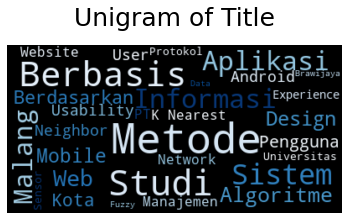

In [14]:
ind_stopwords = stopwords.words('indonesian')
text = " ".join(word for word in titles)
wordcloud = WordCloud(background_color='black', stopwords=ind_stopwords, colormap='Blues', max_font_size=50, max_words=30).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Unigram of Title', pad=20, fontsize=25)
plt.show()

## Berdasarkan Kolom Date


### Jumlah Per Tanggal Penerbitan

In [15]:
df['date'].value_counts()

2017-08-30    68
2020-01-17    58
2018-02-12    54
2019-08-14    40
2019-08-15    40
              ..
2019-12-27     1
2019-12-17     1
2019-12-05     1
2019-12-04     1
2019-08-07     1
Name: date, Length: 582, dtype: int64

### Visualisasi Berdasarkan Tanggal Penerbitan

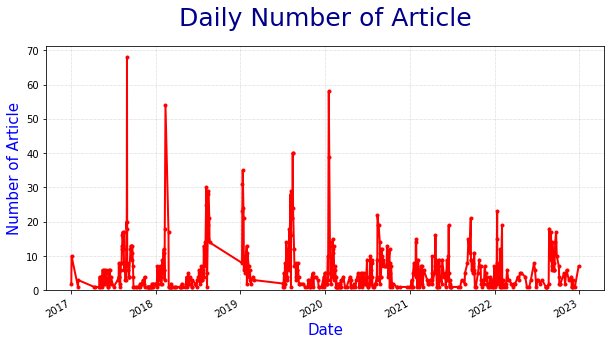

In [16]:
plt.figure(figsize=(10, 5))
df.groupby(['date'])['title'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Article', loc='center', pad=20, fontsize=25, color='darkblue')
plt.xlabel('Date', fontsize=15, color='blue')
plt.ylabel('Number of Article', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

## Berdasarkan Kolom Abstract

### Jumlah Kata di dalam Abstrak

In [17]:
abstracts = df['abstract'].str.split().str[1]

for i in range(2, 255):
    abstracts = abstracts.append(df['abstract'].str.split().str[i])

abstracts.isna().sum()
abstracts.dropna(inplace=True)

abstracts.value_counts()

yang             24603
dan              18125
dengan           11696
untuk             9576
pada              9449
                 ...  
menangani,           1
ukur.                1
nasionalisme         1
arsitekturnya        1
(hops),              1
Name: abstract, Length: 45197, dtype: int64

### WordCloud Kata di dalam Abstrak

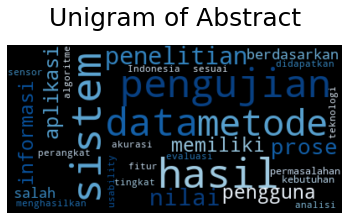

In [18]:
ind_stopwords = stopwords.words('indonesian')
text = " ".join(word for word in abstracts)
wordcloud = WordCloud(background_color='black', stopwords=ind_stopwords, colormap='Blues', max_font_size=50, max_words=30).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Unigram of Abstract', pad=20, fontsize=25)
plt.show()

## Berdasarkan Kolom Author


### Jumlah Per Penulis

In [19]:
authors = {'author' : df['author1'].append(df['author2']).append(df['author3']).reset_index(drop=True)}
authors = pd.DataFrame(authors)
authors.value_counts()

author                   
                             216
Retno Indah Rokhmawati       175
Hanifah Muslimah Az-Zahra    168
Satrio Hadi Wijoyo           140
Yusi Tyroni Mursityo         139
                            ... 
Farah Nabilla Putri Irzan      1
Farah Shofiatul Ummah          1
Farandi Angesti                1
Fardan Ainul Yaqiin            1
Zuroul Mufarokah               1
Length: 3680, dtype: int64

### Visualisasi Berdasarkan Penulis (5 Teratas)

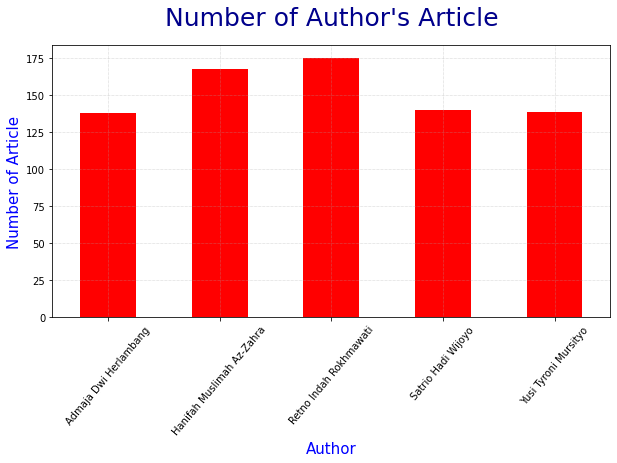

In [20]:
authors = authors['author'].value_counts(ascending=False).reset_index()
authors.columns = ['author', 'count']
authors = authors.drop(0)
authors = authors.head()

plt.figure(figsize=(10, 5))
authors.groupby('author')['count'].sum().plot(color='red', kind='bar')
plt.title('Number of Author\'s Article', loc='center', pad=20, fontsize=25, color='darkblue')
plt.xlabel('Author', fontsize=15, color='blue')
plt.ylabel('Number of Article', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.xticks(rotation=50)
plt.ylim(ymin=0)
plt.show()

## Berdasarkan Kolom Institution


### Jumlah per Institusi

In [21]:
institutions = {'institution' : df['institution1'].append(df['institution2']).append(df['institution3']).reset_index(drop=True)}
institutions = pd.DataFrame(institutions)
institutions.value_counts()

institution                                                                                 
Fakultas Ilmu Komputer, Universitas Brawijaya                                                   10117
Tidak diketahui                                                                                   241
Universitas Brawijaya                                                                              28
Fakultas Perikanan dan Ilmu Kelautan, Universitas Brawijaya                                        19
Balai Pengkajian Teknologi Pertanian Jawa Timur                                                     9
Fakultas Matematika dan Ilmu Pengetahuan Alam, Universitas Brawijaya                                8
Fakultas Kedokteran, Universitas Brawijaya                                                          4
Balai Penelitian Tanaman Jeruk dan Buah Subtropika, Badan Litbang Pertanian                         3
Teknik Komputer, Fakultas Ilmu Komputer, Universitas Indonesia                             

### Visualisasi Berdasarkan Institusi

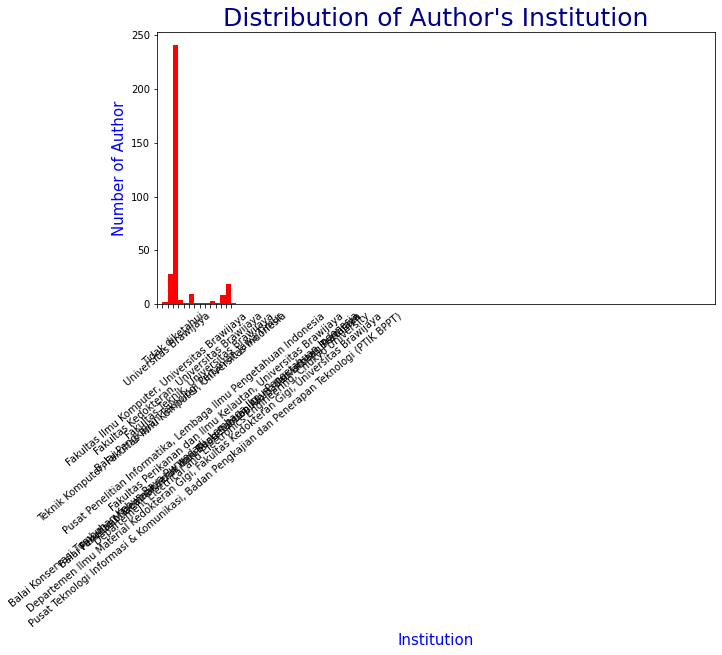

In [22]:
plt.figure(figsize = (10, 5))
plt.hist(institutions['institution'], bins = 100, range = (1, 100), color = 'red')
plt.title('Distribution of Author\'s Institution', fontsize = 25, color = 'darkblue')
plt.xlabel('Institution', fontsize = 15, color = 'blue')
plt.ylabel('Number of Author', fontsize = 15, color = 'blue')
plt.xlim(xmin = 0)
plt.ylim(ymin = 0)
plt.xticks(rotation=40)
plt.show()

## Insight
Dari bagian Exploratory Data Analysis, terdapat beberapa hal yang dapat diketahui:
* Kata yang paling banyak ditemukan dalam judul artikel adalah 'dan' apabila mengandung stop words dan 'metode' apabila tidak mengandung stop words
* Artikel paling banyak diterbitkan pada 2017-08-30, yaitu 30 Agustus 2017
* Kata yang paling banyak ditemukan dalam abstrak adalah 'yang' apabila mengandung stop words dan 'hasil' apabila tidak mengandung stop words
* Penulis yang paling banyak menulis artikel adalah Retno Indah Rokhmawati
* Institusi yang paling banyak menghasilkan artikel adalah Fakultas Ilmu Komputer, Universitas Brawijaya

# 4. Clustering
Clustering adalah suatu proses pengelompokan data berdasarkan kesamaan atribut-atribut yang dimiliki. Tujuan clustering sendiri adalah untuk mengelompokkan data yang berkaitan satu sama lain. Clustering merupakan salah satu jenis algoritma dari unsupervised learning. Unsupervised learning sendiri merupakan metode pembelajaran mesin di mana data tidak memiliki label, atau dapat dikatakan bahwa algoritma diberi data tanpa instruksi tentang apa yang harus dilakukan dengan data tersebut. Dengan kata lain, unsupervised learning adalah metode di mana algoritma dapat menemukan struktur dan pola dari data tanpa bantuan dari label.

## Ekstrak Kata Kunci Menggunakan TFIDFVectorizer
TFIDFVectorizer merupakan salah satu teknik pengolahan kata yang mengukur bobot kata dalam sebuah dokumen menggunakan rumus TFIDFVectorizer. Alasan pemilihan TFIDFVectorizer daripada CountVectorizer karena CountVectorizer adalah suatu teknik pengolahan kata yang menghitung jumlah kemunculan kata dalam sebuah dokumen. Dalam hal ini, TFIDFVectorizer lebih baik daripada CountVectorizer karena TFIDFVectorizer memberikan hasil lebih akurat dan relevan dengan menggunakan rumus TF-IDF.

TF-IDF adalah singkatan dari Term Frequency-Inverse Document Frequency. Ini adalah metode yang digunakan untuk mengukur relevansi suatu dokumen terhadap kueri tertentu. TF mengacu pada jumlah kata yang muncul dalam dokumen, sedangkan IDF mengacu pada jumlah dokumen yang mengandung kata tersebut. TF-IDF menggabungkan kedua metrik ini untuk memberikan nilai yang mengindikasikan relevansi suatu dokumen terhadap kueri. Nilai TF-IDF berasal dari perkalian antara TF dan IDF. Semakin tinggi nilai TF-IDF, semakin tinggi relevansi dokumen terhadap kueri. Berikut adalah rumus TF-IDF:

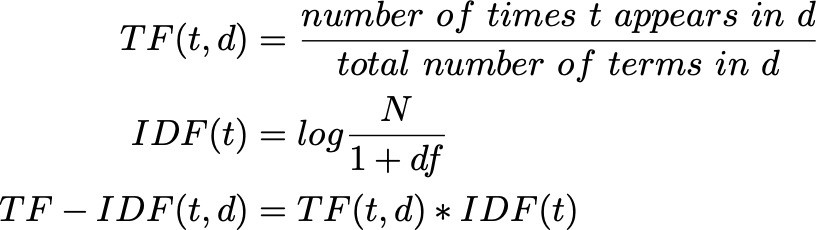

In [23]:
ind_stopwords = stopwords.words('indonesian')

vectorizer = TfidfVectorizer(max_df=0.9,
                             min_df=5, 
                             use_idf=True, 
                             smooth_idf=True,        
                             stop_words=ind_stopwords, 
                             lowercase=True,   
                             norm=u'l2',    
                            )

tfidf = vectorizer.fit_transform(df['abstract'])

## Text Clustering dengan Minibatch K-Means
Text Clustering adalah suatu teknik kluster yang digunakan untuk mengelompokkan dokumen atau teks berdasarkan kesamaan tema atau topik. Teknik ini membantu para peneliti untuk memahami konteks dari banyak dokumen dengan lebih baik. Proses ini mengelompokkan teks berdasarkan kata-kata yang sering digunakan dalam setiap dokumen. Setiap grup berisi dokumen yang memiliki tema yang sama.

K-means adalah algoritma clustering non-hirarkis yang digunakan untuk mengelompokkan item menjadi beberapa kluster. Minibatch K-Means adalah varian dari K-Means yang menggunakan algoritma batching untuk memproses data lebih cepat. Algoritma ini memecah data yang diberikan menjadi beberapa batch kecil, dan kemudian menggunakan algoritma K-Means untuk menghitung kluster dalam setiap batch. Dengan menggunakan algoritma minibatch, algoritma K-Means menjadi lebih cepat dan mudah dalam memproses data yang lebih besar.

### Elbow Method
Elbow method merupakan salah satu metode yang dapat digunakan untuk menentukan nilai k optimal dalam proses clustering. Metode ini menggunakan plot antara SSE (Sum of Squared Errors) terhadap nilai k untuk menentukan nilai k yang tepat. Dengan menggunakan metode ini, kita dapat melihat nilai k mana yang menghasilkan nilai SSE yang paling rendah. Setelah melihat plot tersebut, nilai k yang optimal adalah nilai k yang menghasilkan nilai SSE yang paling rendah dan berada di sebelah kiri lurus dari "siku" (elbow) pada plot tersebut. Dengan kata lain, nilai k yang optimal adalah nilai k yang menghasilkan perubahan SSE yang paling kecil di antara nilai k lainnya.

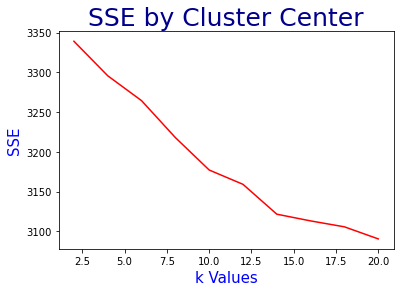

In [24]:
def optimal_clusters_elbow(data, max_k):
    K = range(2, max_k+1, 2)
    sse = []
    for k in K:
        sse.append(MiniBatchKMeans(n_clusters=k, 
                                   init_size=1024, 
                                   batch_size=2048, 
                                   random_state=20).fit(data).inertia_)

    plt.plot(K, sse, '-', color='red')
    plt.title('SSE by Cluster Center', fontsize=25, color='darkblue')
    plt.xlabel('k Values', fontsize=15, color='blue')
    plt.ylabel('SSE', fontsize=15, color='blue')
    plt.show()
    
optimal_clusters_elbow(tfidf, 20)

### Silhouette Score
Nilai k yang optimal dalam silhouette score dapat ditentukan dengan menggunakan metode percobaan dan kesalahan. Nilai silhouette yang optimal (nilai tertinggi) untuk menentukan jumlah kluster yang optimal.

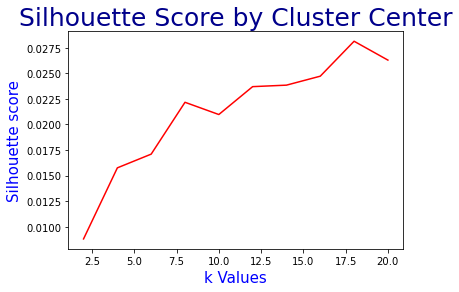

In [25]:
def optimal_clusters_silhouette(data, max_k):
    K = range(2, max_k+1, 2)
    silhouette = []
    for k in K:
        silhouette.append(silhouette_score(data, MiniBatchKMeans(n_clusters=k,
                                                           init_size=1024,
                                                           batch_size=2048).fit(data).predict(data)))

    plt.plot(K, silhouette, '-', color='red')
    plt.title('Silhouette Score by Cluster Center', fontsize=25, color='darkblue')
    plt.xlabel('k Values', fontsize=15, color='blue')
    plt.ylabel('Silhouette score', fontsize=15, color='blue')
    plt.show()
    
optimal_clusters_silhouette(tfidf, 20)

## Cluster Optimal
Berdasarkan 2 grafik di atas, nilai k yang paling optimal adalah 18. Pada grafik Elbow Method, nilai k yang menghasilkan perubahan paling kecil adalah di antara 17,5 hingga 20. Sedangkan, pada grafik Silhouette Score, nilai k yang menghasilkan skor paling maksimal berada di antara 17,5 hingga 20. Grafik di atas dapat berubah-ubah ketika dijalankan.

In [26]:
clusters = MiniBatchKMeans(n_clusters=18, 
                           init_size=1024, 
                           batch_size=2048,
                           random_state=20).fit_predict(tfidf)

## Cluster Plot
Terdapat dua plot dalam menggambarkan clustering, yaitu plot menggunakan PCA yang lebih baik dalam menangkap struktur global data dan menggunakan TSNE yang lebih baik dalam menangkap hubungan antara tetangga. Keduanya adalah teknik statistik yang teknik statistik yang digunakan untuk membongkar varians atau korelasi antara banyak variabel yang berbeda. Untuk mempercepat proses dengan TSNE, 3.000 dokumen diambil sebagai contoh dan melakukan pengurangan dimensi PCA sebesar 50 pada data tersebut. Selanjutnya turun ke 300 poin.

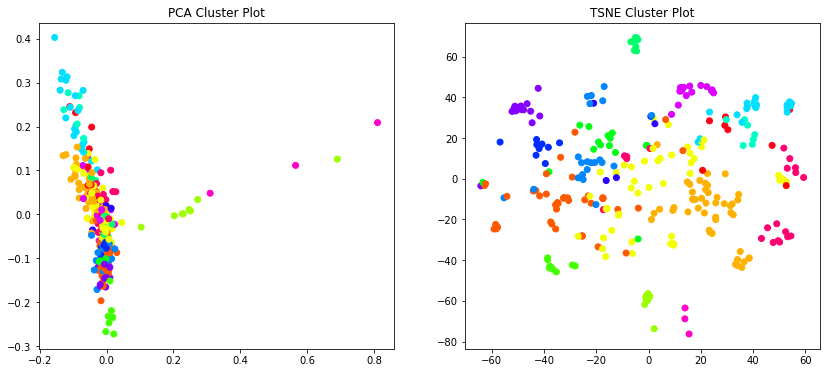

In [27]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(tfidf, clusters)

## Kata Kunci Teratas
Kata kunci teratas akan didapatkan berdasarkan dari skor TFIDF-nya untuk melihat tren. Rata-rata dari setiap dimensi dicari untuk kemudian dikelompokkan berdasarkan cluster. Dengan menggunakan numpy, kata-kata teratas akan ditemukan dengan mengurutkan nilai rata-rata untuk setiap baris, dan mengambil N teratas.


In [28]:
def top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    print('Kata Kunci Teratas')
    for i, j in df.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([labels[k] for k in np.argsort(j)[-n_terms:]]))
            
top_keywords(tfidf, clusters, vectorizer.get_feature_names(), 10)

Kata Kunci Teratas

Cluster 0
qual, layanan, malang, penelitian, loyalitas, data, perusahaan, kepuasan, customer, pelanggan

Cluster 1
suhu, node, air, pengujian, iot, perangkat, robot, data, sistem, sensor

Cluster 2
hasil, data, perancangan, informasi, fungsional, kebutuhan, bisnis, pengujian, proses, sistem

Cluster 3
android, metode, perangkat, penelitian, hasil, data, pengguna, sistem, pengujian, aplikasi

Cluster 4
information, engineering, technology, and, journal, international, siet, jtiik, artikel, dipublikasikan

Cluster 5
serangan, manet, network, delay, end, packet, jaringan, protokol, routing, node

Cluster 6
populasi, parameter, gizi, crossover, makanan, optimal, nilai, fitness, genetika, algoritme

Cluster 7
genre, metode, npc, user, experience, bermain, gim, pemain, permainan, game

Cluster 8
centered, antarmuka, design, hcd, perbaikan, usability, solusi, evaluasi, pengguna, desain

Cluster 9
heuristic, antarmuka, efficiency, perbaikan, permasalahan, evaluasi, pengguna

## Hasil Prediksi dari Clustering
Kolom cluster akan ditambahkan pada dataframe. Kolom tersebut bernilai tipe data Integer.

### Hasil Dataframe

In [29]:
kmeans = MiniBatchKMeans(n_clusters=18, 
                           init_size=1024, 
                           batch_size=2048,
                           random_state=20).fit(tfidf)

df['cluster'] = (kmeans.labels_).astype(int)
df.head()

,title,link,date,abstract,author1,institution1,author2,institution2,author3,institution3,cluster
0,Interactive Mixed Reality System Menggunakan ...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,Teknologi mixed reality akan membuat interaksi...,Aristyo Pramana,"Fakultas Ilmu Komputer, Universitas Brawijaya",Eriq Muh. Adams Jonemaro,"Fakultas Ilmu Komputer, Universitas Brawijaya",Wibisono Sukmo Wardhono,"Fakultas Ilmu Komputer, Universitas Brawijaya",3
1,Optimasi Penjadwalan Mata Pelajaran Menggunak...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,Penjadwalan merupakan salah satu proses pentin...,Olive Khoirul L.M.A.,"Fakultas Ilmu Komputer, Universitas Brawijaya",Agus Wahyu Widodo,"Fakultas Ilmu Komputer, Universitas Brawijaya",Budi Darma Setiawan,Tidak diketahui,6
2,Pengembangan Push Notification Menggunakan We...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,Untuk memenuhi kebutuhan masyarakat akan keter...,Andrias Yudianto,"Fakultas Ilmu Komputer, Universitas Brawijaya",Eko Sakti Pramukantoro,"Fakultas Ilmu Komputer, Universitas Brawijaya",Kasyful Amron,"Fakultas Ilmu Komputer, Universitas Brawijaya",1
3,Pembangunan Sistem Informasi Manajemen Keluha...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,Perusahaan McDonald’s adalah perusahaan yang b...,Adzanil Rachmadi P,"Fakultas Ilmu Komputer, Universitas Brawijaya",Fatwa Ramdani,"Fakultas Ilmu Komputer, Universitas Brawijaya",Retno Indah Rokhmawati,"Fakultas Ilmu Komputer, Universitas Brawijaya",0
4,Implementasi Metode Store and Forward Pada Hy...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,2017-01-03,Perkembangan internet saat ini sangat pesat. D...,Muhammad Gigih Wicaksono,"Fakultas Ilmu Komputer, Universitas Brawijaya",Aswin Suharsono,"Fakultas Ilmu Komputer, Universitas Brawijaya",Adhitya Bhawiyuga,"Fakultas Ilmu Komputer, Universitas Brawijaya",5


### Jumlah Per Cluster

In [30]:
df['cluster'].value_counts()

3     573
2     521
1     415
10    303
16    241
9     197
5     167
6     160
13    139
14    129
11    124
17    109
4     103
15     74
8      74
7      61
12     49
0      40
Name: cluster, dtype: int64

### Visualisasi Berdasarkan Cluster

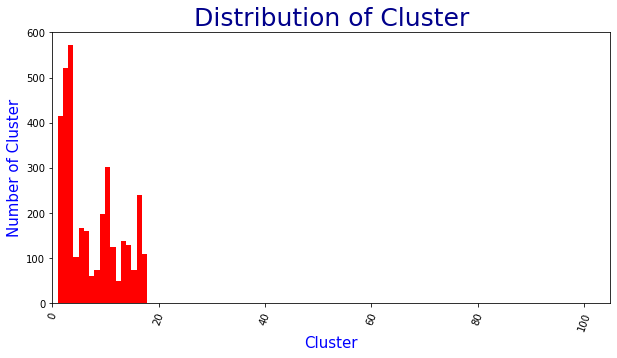

In [31]:
plt.figure(figsize = (10, 5))
plt.hist(df['cluster'], bins = 100, range = (1, 100), color = 'red')
plt.title('Distribution of Cluster', fontsize = 25, color = 'darkblue')
plt.xlabel('Cluster', fontsize = 15, color = 'blue')
plt.ylabel('Number of Cluster', fontsize = 15, color = 'blue')
plt.xlim(xmin = 0)
plt.ylim(ymin = 0)
plt.xticks(rotation=70)
plt.show()

## Insight
Dari bagian Clustering, terdapat beberapa hal yang dapat diketahui:
* Nilai k optimal untuk clustering adalah 18 didapatkan melalui dua metode, yaitu elbow method dan silhoutte score
* Setelah artikel dikelompokkan menjadi 18 cluster, cluster 3 adalah cluster dengan artikel terbanyak. Cluster 3 berisi seputar aplikasi, metode, perangkat, dan lain sebagainya

# 5. Article Recommendations With K-Nearest Neighbor and Cosine Similarity
K-Nearest Neighbor (KNN) adalah metode klasifikasi yang menggunakan algoritme komputasi untuk mencari tingkat kemiripan antara data baru dan data yang sudah ada. Algoritma ini mengukur jarak antara data baru dan data yang sudah ada, lalu mencari k data terdekat (k-nearest) dari data baru. Data terdekat tersebut digunakan untuk memprediksi kelas dari data baru. KNN dapat digunakan dalam berbagai bidang, seperti klasifikasi gambar, analisis kredit, dan analisis komputasi lainnya. Berikut adalah rumus K_Nearest Neighbor:

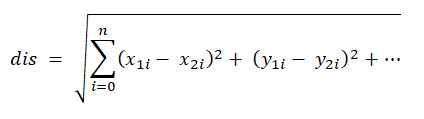

Cosine similarity adalah metode untuk mengukur kesamaan antara 2 vektor. Ini dihitung dengan menghitung kosinus antara 2 vektor. Ini khususnya berguna dalam mesin pembelajaran berkomputasi dan pengenalan pola, di mana kita perlu mencari kesamaan antara 2 vektor. Berikut adalah rumus Cosine Similarity:

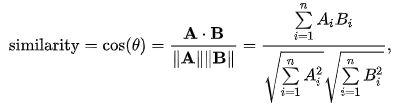

## Memisahkan Dataframe
Kolom title dan abstrak dipisah masing-masing menjadi kedua dataframe yang berbeda. Tujuannya adalah untuk memudahkan pada akhir pembuatan rekomendasi.

### Memisahkan Kolom Title

In [32]:
titles = df[['title']]
titles.head()

,title
0,Interactive Mixed Reality System Menggunakan ...
1,Optimasi Penjadwalan Mata Pelajaran Menggunak...
2,Pengembangan Push Notification Menggunakan We...
3,Pembangunan Sistem Informasi Manajemen Keluha...
4,Implementasi Metode Store and Forward Pada Hy...


### Memisahkan Kolom Abstract

In [33]:
abstracts = df[['abstract']]
abstracts.head()

,abstract
0,Teknologi mixed reality akan membuat interaksi...
1,Penjadwalan merupakan salah satu proses pentin...
2,Untuk memenuhi kebutuhan masyarakat akan keter...
3,Perusahaan McDonald’s adalah perusahaan yang b...
4,Perkembangan internet saat ini sangat pesat. D...


## Memilih Feature Engineering
Feature engineering adalah proses pemodelan, ekstraksi, dan transformasi fitur (variabel) yang digunakan dalam data mining dan machine learning. Feature engineering adalah proses untuk menciptakan fitur yang dapat meningkatkan akurasi model dan mengurangi kompleksitas. Proses ini melibatkan memilih yang terbaik dari fitur yang tersedia, menciptakan fitur baru, dan memilih metode terbaik untuk menyebarkan data. Kolom yang akan digunakan dalam proses ini adalah author dan cluster.

### Memisahkan Kolom Author

In [34]:
recom_auth = df[['author1', 'author2', 'author3']]
recom_auth.head()

,author1,author2,author3
0,Aristyo Pramana,Eriq Muh. Adams Jonemaro,Wibisono Sukmo Wardhono
1,Olive Khoirul L.M.A.,Agus Wahyu Widodo,Budi Darma Setiawan
2,Andrias Yudianto,Eko Sakti Pramukantoro,Kasyful Amron
3,Adzanil Rachmadi P,Fatwa Ramdani,Retno Indah Rokhmawati
4,Muhammad Gigih Wicaksono,Aswin Suharsono,Adhitya Bhawiyuga


### Membuat ID Untuk Author
Pembuatan ID bertujuan untuk label identitas pada setiap author memudahkan proses selanjutnya, yaitu feature scaling.

In [35]:
authors = {'author' : df['author1'].append(df['author2']).append(df['author3']).reset_index(drop=True)}
authors = pd.DataFrame(authors)

arr_auth = []
arr_auth = authors['author'].unique()

auth = pd.DataFrame(arr_auth, columns = ['author'])
lst = np.arange(1, 3681).tolist()
auth['id'] = lst

auth.head()

,author,id
0,Aristyo Pramana,1
1,Olive Khoirul L.M.A.,2
2,Andrias Yudianto,3
3,Adzanil Rachmadi P,4
4,Muhammad Gigih Wicaksono,5


In [36]:
author1 = df[['author1']]
auth = auth.rename(columns = {'author': 'author1', 'id' : 'id1'}, inplace = False)
df1 = pd.merge(author1, auth)

recom_auth = pd.merge(recom_auth, df1)
recom_auth = recom_auth.drop('author1', axis=1)

author2 = df[['author2']]
auth = auth.rename(columns = {'author1': 'author2', 'id1' : 'id2'}, inplace = False)
df2 = pd.merge(author2, auth)

recom_auth = pd.merge(recom_auth, df2)
recom_auth = recom_auth.drop('author2', axis=1)

author3 = df[['author3']]
auth = auth.rename(columns = {'author2': 'author3', 'id2' : 'id3'}, inplace = False)
df3 = pd.merge(author3, auth)

recom_auth = pd.merge(recom_auth, df3)
recom_auth = recom_auth.drop('author3', axis=1)

recom_auth.head()

,id1,id2,id3
0,1,3474,3522
1,1,3474,3522
2,1,3474,3522
3,1,3474,3522
4,1,3474,3522


## Feature Scaling
Feature scaling adalah teknik yang digunakan untuk mengatur nilai dari sejumlah fitur atribut data yang berbeda menjadi skala yang sama. Teknik ini berguna untuk mempercepat komputasi algoritma yang dijalankan pada suatu data. Ini juga membantu mengurangi dimensi data dan meminimalkan efek dari variabel yang terlalu besar atau terlalu kecil. Teknik ini diterapkan pada dataframe author yang sudah dibagi menjadi nilai yang berbeda sesuai ID.

In [37]:
scale = MinMaxScaler()
scalled = scale.fit_transform(recom_auth)

i=0
for col in recom_auth.columns:
    recom_auth[col] = scalled[:,i]
    i += 1

recom_auth['title'] = df['title']
recom_auth.head() 

,id1,id2,id3,title
0,0.0,0.909714,0.905219,Interactive Mixed Reality System Menggunakan ...
1,0.0,0.909714,0.905219,Optimasi Penjadwalan Mata Pelajaran Menggunak...
2,0.0,0.909714,0.905219,Pengembangan Push Notification Menggunakan We...
3,0.0,0.909714,0.905219,Pembangunan Sistem Informasi Manajemen Keluha...
4,0.0,0.909714,0.905219,Implementasi Metode Store and Forward Pada Hy...


## One Hot Encoding
One Hot Encoding adalah teknik konversi data kategorikal menjadi representasi vektor. Teknik ini mengubah setiap nilai unik dari kolom kategorikal menjadi sebuah kolom binari dengan nilai 1 atau 0. Untuk masing-masing nilai unik kolom, sebuah kolom baru dibuat dengan nilai 1 di baris tertentu yang menunjukkan nilai unik itu. Ini berguna ketika memprediksi kelas dari data kategorikal dengan algoritma ML. Dataframe cluster akan dikonversi menjadi kolom binari.

In [38]:
dummies = pd.get_dummies(df['cluster'], drop_first=True)
dummies['title'] = df['title']
dummies.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,title
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Interactive Mixed Reality System Menggunakan ...
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Optimasi Penjadwalan Mata Pelajaran Menggunak...
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Pengembangan Push Notification Menggunakan We...
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Pembangunan Sistem Informasi Manajemen Keluha...
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Implementasi Metode Store and Forward Pada Hy...


## Merge Dataframe
Kedua dataframe, yaitu author dan cluster akan digabungkan menjadi satu dataframe.

In [39]:
new_df = pd.merge(recom_auth, dummies)
new_df = new_df.drop('title', axis=1)
new_df

,id1,id2,id3,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,0.909714,0.905219,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.909714,0.905219,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.909714,0.905219,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.909714,0.905219,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.909714,0.905219,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,0.023906,0.927771,0.905219,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3475,0.023906,0.927771,0.905219,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3476,0.023906,0.927771,0.905219,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3477,0.023906,0.927771,0.905219,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Title menjadi Index
Proses ini befungsi untuk memudahkan dalam melihat data.

In [40]:
new_df.index = [t for t in titles['title']]
abstracts.index = [t for t in titles['title']]

new_df.head()

,id1,id2,id3,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Interactive Mixed Reality System Menggunakan Pepper Ghost System dan Kendali Gerakan Tangan Berbasis Kinect,0.0,0.909714,0.905219,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Optimasi Penjadwalan Mata Pelajaran Menggunakan Metode Tabu Search,0.0,0.909714,0.905219,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Pengembangan Push Notification Menggunakan Websocket,0.0,0.909714,0.905219,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Pembangunan Sistem Informasi Manajemen Keluhan Pelanggan Berbasis WebGis,0.0,0.909714,0.905219,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Implementasi Metode Store and Forward Pada Hypertext Transfer Protocol (HTTP),0.0,0.909714,0.905219,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Membuat Fungsi Rekomendasi
Fungsi ini mempunyai parameter berupa lokasi dari artikel, jumlah artikel yang direkomendasikan, dan skor kemiripan. Fungsi ini berisi penghitungan skor kemiripan dari abstract dan title dengan menggunakan K-Nearest Neighbor dan Cosine Similarity.

In [41]:
def get_recommendation(article, no_of_recommend=20, get_similarity_rate=False):
    
    kn = NearestNeighbors(n_neighbors=no_of_recommend+1,metric='manhattan')
    kn.fit(new_df)
    
    distances, indices = kn.kneighbors(new_df.loc[article])
    
    print(f'Berikut Adalah Rekomendasi Untuk Artikel "{article[0]}"')
    nearest_article = [titles.loc[i][0] for i in indices.flatten()][1:]
    if not get_similarity_rate:
        return nearest_article
    sim_rates = []
    abstract = []
    for art in nearest_article:
        abstract.append(abstracts.loc[art][0])
        sim = cosine_similarity(new_df.loc[article],[new_df.loc[art]]).flatten()
        sim_rates.append(sim[0])
    recommended_article = pd.DataFrame({'recommendation':nearest_article,'abstract':abstract, 'similarity_score':sim_rates})
    recommended_article.sort_values(by='similarity_score',ascending=True)
    return recommended_article

## Hasil Rekomendasi
Dengan memanggil fungsi recommendation dan memasukkan parameternya. Sejumlah artikel akan tertampil, beserta abstrak dan skor kemiripannya.

In [42]:
rd1 = titles.loc[3]
get_recommendation(rd1, no_of_recommend=20, get_similarity_rate=True)

Berikut Adalah Rekomendasi Untuk Artikel " Pembangunan Sistem Informasi Manajemen Keluhan Pelanggan Berbasis WebGis"


,recommendation,abstract,similarity_score
0,Pembangunan Aplikasi Cross-Platform Pelacak K...,Salah satu faktor yang dapat mempertahankan su...,1.000000
1,Pengembangan Sistem Informasi Manajemen Rewar...,Pepito Market Cabang Sanur merupakan salah sat...,1.000000
2,Pengembangan Sistem Self-Service Reservation ...,Customer Relationship Management (CRM) merupak...,1.000000
3,Analisis Kualitas Layanan Website Erafone ter...,Jumlah bisnis yang beroperasi di internet deng...,1.000000
4,Pembangunan Sistem Informasi Manajemen Keluha...,Perusahaan McDonald’s adalah perusahaan yang b...,1.000000
5,Pengembangan Sistem Informasi E-Complaint (St...,Salah satu tujuan GraPARI Telkomsel Malang ada...,1.000000
6,Analisis Pengaruh Kualitas Website Terhadap K...,E-commerce merupakan pasar online yang berkemb...,1.000000
7,Analisis Kualitas Layanan Website id.oriflame...,Website id.oriflame.com merupakan e-commerce p...,1.000000
8,Implementasi Algoritma Genetika Untuk Penjadw...,Karena kebutuhan akan transportasi yang tinggi...,1.000000
9,Segmentasi Pelanggan Menggunakan Metode K-Mea...,Belle Crown merupakan salah satu klinik kecant...,0.999961


## Insight
Dari bagian Article Recommendations With K-Nearest Neighbor and Cosine Similarity, terdapat beberapa hal yang dapat diketahui:
* Penggunaan metode tersebut tidak cocok dengan data yang ada karena kurangnya kolom yang mengandung angka walaupun sudah dilakukan clustering, tetapi data ini pada awalnya merupakan unsupervised learning
* Metode ini lebih cocok untuk data berbentuk vektor dan berdimensi tinggi 

# 6. Article Recommendations With Content Based
Content-Based Recommender System adalah algoritma rekomendasi yang menggunakan informasi tentang item untuk menghasilkan rekomendasi untuk pengguna. Algoritma ini menganalisis preferensi pengguna berdasarkan informasi yang tersedia tentang item yang mereka telah gunakan atau pilih sebelumnya. Rekomendasi dikembangkan dengan mencocokkan preferensi pengguna dengan informasi tentang item yang tersedia. Algoritma ini berbeda dengan algoritma rekomendasi lainnya, seperti collaborative filtering yang menggunakan informasi tentang pengguna untuk menghasilkan rekomendasi.

## Memisahkan Kolom yang Relevan
Kolom yang akan digunakan dalam proses ini hanyalah title, cluster, abstract, dan link. Kolom hanya digunakan untuk deployment agar pengguna dapat langsung mengunjungi artikel tersebut setelah mendapat rekomendasi.

In [43]:
data = df[['title', 'cluster', 'abstract', 'link']]
data.head()

,title,cluster,abstract,link
0,Interactive Mixed Reality System Menggunakan ...,3,Teknologi mixed reality akan membuat interaksi...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...
1,Optimasi Penjadwalan Mata Pelajaran Menggunak...,6,Penjadwalan merupakan salah satu proses pentin...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...
2,Pengembangan Push Notification Menggunakan We...,1,Untuk memenuhi kebutuhan masyarakat akan keter...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...
3,Pembangunan Sistem Informasi Manajemen Keluha...,0,Perusahaan McDonald’s adalah perusahaan yang b...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...
4,Implementasi Metode Store and Forward Pada Hy...,5,Perkembangan internet saat ini sangat pesat. D...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...


## Lower Case, Tokenize, Punctuation, dan Stop Words
Setiap data yang berada di dalam dataframe dimanipulasi, seperti dijadikan huruf kecil, ditokenisasi (dipisah-pisah), menghilangkan tanda baca dan kata-kata umum yang ada dalam bahasa Indonesia. Tujuannya adalah memperbudah dalam proses content based. Kata-kata yang sudah dipisah tersebut akan menjadi list. 

In [44]:
data['title_list'] = data['title'].str.lower()
data['abstract'] = data['abstract'].str.lower()

data['title_list'] = data['title_list'].apply(word_tokenize)
data['abstract'] = data['abstract'].apply(word_tokenize)

list_stopwords = set(stopwords.words('indonesian') + list(punctuation))
data['title_list'] = data['title_list'].apply(lambda x: [word for word in x if word not in list_stopwords])
data['abstract'] = data['abstract'].apply(lambda x: [word for word in x if word not in list_stopwords])

data['abstract'] = data['abstract'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
data['abstract'] = data['abstract'].apply(lambda x : [word for word in x if len(word) > 0])

data['title_list'] = data['title_list'].apply(lambda x : list(set(x)))
data['abstract'] = data['abstract'].apply(lambda x : list(set(x)))

## Import Gensim dan Download Word2Vec
Gensim adalah modul Python yang sangat efisien dan kuat untuk membangun dan melatih model representasi teks, yang dikenal sebagai representasi vektor kata. Ini menggunakan metode seperti Latent Semantic Analysis (LSA) atau Latent Dirichlet Allocation (LDA). Gensim juga menyediakan implementasi algoritma topik modeling yang kuat, yang dapat digunakan untuk menemukan topik dalam teks. Word2Vec adalah teknik pembelajaran mesin yang digunakan untuk membuat representasi vektor kata. Ini mengubah kata-kata menjadi vektor yang mencerminkan konteks dan makna dari kata-kata tersebut. Teknik ini juga memiliki kemampuan untuk mengidentifikasi kata-kata yang memiliki makna serupa dalam konteks yang berbeda. Word2Vec dapat digunakan untuk berbagai aplikasi seperti analisis teks, pemrosesan bahasa alami, dan masih banyak lagi.

In [45]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

from gensim import models
wv = models.KeyedVectors.load_word2vec_format('/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz',
                                              binary=True)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


## Mencari Kemiripan Berdasarkan Title, Cluster, dan Abstract

### Menggunakan Vocab
Vocab dalam Word2Vec adalah kumpulan kata-kata yang digunakan untuk mengklasifikasikan kata-kata yang muncul dalam teks. Ini mengacu pada kata-kata yang muncul dalam korpus (kumpulan teks) yang digunakan untuk mengukur kemiripan antara kata-kata. Word2Vec menggunakan vocab untuk mengklasifikasikan dan mengukur kemiripan antara kata-kata, yang memungkinkan algoritme untuk melakukan klasifikasi dan prediksi berdasarkan data yang tersedia.

In [46]:
matrix_article_vocab = []
for list_ in data.to_numpy():
    list_[2] = [word for word in list_[2] if word in wv]
    list_[4] = [word for word in list_[4] if word in wv]
    matrix_article_vocab.append(list_)
    
matrix_article_vocab = pd.DataFrame(matrix_article_vocab, columns=data.columns)
matrix_article_vocab.head()

,title,cluster,abstract,link,title_list
0,Interactive Mixed Reality System Menggunakan ...,3,"[salah, mouse, dunia, real, user, maya, bahasa...",https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,"[interactive, ghost, reality, tangan, kinect, ..."
1,Optimasi Penjadwalan Mata Pelajaran Menggunak...,6,"[salah, mata, sistem, total, move, list, micro...",https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,"[mata, search, tabu]"
2,Pengembangan Push Notification Menggunakan We...,1,"[broker, push, hypertext, notification, client...",https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,"[notification, push]"
3,Pembangunan Sistem Informasi Manajemen Keluha...,0,"[salah, zero, relationship, customer, gong, s,...",https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,[sistem]
4,Implementasi Metode Store and Forward Pada Hy...,5,"[header, raspberry, tcp, forward, tolerant, fi...",https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,"[transfer, store, hypertext, protocol, forward..."


### Membuat Fungsi Rekomendasi
Fungsi ini mempunyai parameter berupa judul dari artikel yang nantinya akan dimasukkan oleh pengguna. Fungsi ini berisi penghitungan skor kemiripan dari abstract dan title dengan menggunakan Word2Vec.

In [47]:
def recommendation(title):
    matrix_article_title_vocab = []
    for list_ in data[data['title'].str.contains(title)].to_numpy():
        list_[2] = [word for word in list_[2] if word in wv]
        list_[4] = [word for word in list_[4] if word in wv]
        matrix_article_title_vocab.append(list_)

    matrix_similarity = []
    for list1 in matrix_article_vocab.to_numpy():
        for list2 in matrix_article_title_vocab:
            try:
                score_abs = wv.n_similarity(list1[2], list2[2])
                score_title = wv.n_similarity(list1[4], list2[4])/2
            except ZeroDivisionError:
                score_abs = 0
                score_title = 0      
            if ((list1[1] == list2[1]) & (list1[0] != list2[0])):
                matrix_similarity.append([list1[0], list1[3], score_title, score_abs])
    
    print('Berikut Adalah 10 Rekomendasi Untuk Artikel \'' + title + '\'')
    df_article_similarity = pd.DataFrame(matrix_similarity, columns = ['recommendation', 'link', 'score_title','score_abstract'])
    df_article_similarity['final_score'] = df_article_similarity['score_title'] + df_article_similarity['score_abstract']
    return (df_article_similarity.sort_values(by=['final_score', 'score_abstract', 'score_title'], ascending=False).head(10))

## Hasil Rekomendasi
Dengan memanggil fungsi recommendation dan memasukkan parameter berupa judul artikel, 10 artikel dengan skor kemiripan yang paling tinggi akan tertampil.

In [48]:
recommendation('Pembangunan Sistem Informasi Manajemen Keluhan Pelanggan Berbasis WebGis')

Berikut Adalah 10 Rekomendasi Untuk Artikel 'Pembangunan Sistem Informasi Manajemen Keluhan Pelanggan Berbasis WebGis'


,recommendation,link,score_title,score_abstract,final_score
1,Pengembangan Sistem Informasi E-Complaint (St...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.500000,0.803829,1.303829
36,Pengembangan Dashboard Laporan Penjualan dan ...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.279245,0.734333,1.013578
11,Analisis dan Perancangan Sistem Manajemen Pro...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.202903,0.781329,0.984233
25,Pengembangan Sistem Pelayanan Pengaduan Pelan...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.303372,0.677139,0.980511
10,Pengembangan Sistem Informasi Marketing Autom...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.230754,0.739571,0.970325
26,Pengembangan Sistem Monitoring Penggunaan Air...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.208556,0.759070,0.967626
22,Pengembangan Sistem Informasi Pelanggan Binat...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.235275,0.724554,0.959829
27,Pengembangan Sistem Survei Pelanggan berbasis...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.281303,0.673912,0.955214
4,Pengembangan Sistem Informasi Manajemen Rewar...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.147033,0.790537,0.937569
15,Analisis Kualitas Layanan Website Althea Indo...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.201179,0.733828,0.935007


In [49]:
recommendation('Peramalan Jumlah Kunjungan Wisatawan Kota Batu Menggunakan Metode Time Invariant Fuzzy Time Series')

Berikut Adalah 10 Rekomendasi Untuk Artikel 'Peramalan Jumlah Kunjungan Wisatawan Kota Batu Menggunakan Metode Time Invariant Fuzzy Time Series'


,recommendation,link,score_title,score_abstract,final_score
62,Implementasi Metode Time Invariant Fuzzy Time...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.422242,0.807812,1.230054
101,Prediksi Pertumbuhan Jumlah Penduduk Kota Mal...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.403341,0.800531,1.203872
29,Prediksi Jumlah Kendaraan Bermotor Di Indones...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.333533,0.838032,1.171565
14,Penerapan Metode Average-Based Fuzzy Time Ser...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.355065,0.816200,1.171265
105,Prediksi Persentase Penyelesaian Permohonan H...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.364230,0.803521,1.167750
4,Peramalan Permintaan Daging Sapi Nasional Men...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.325189,0.829332,1.154521
98,Prediksi Harga Emas Dengan Menggunakan Metode...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.351662,0.793227,1.144889
92,Peramalan Hasil Panen Kelapa Sawit Menggunaka...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.369034,0.761537,1.130570
122,Perbandingan Metode Fuzzy Time Series Average...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.334644,0.785145,1.119790
11,Implementasi Metode Gabungan Multi-Factors Hi...,https://j-ptiik.ub.ac.id/index.php/j-ptiik/art...,0.337664,0.766107,1.103771


# 7. Deployment

Model ini di-deploy dengan menggunakan Flask, yaitu sebuah framework micro web Python yang berfungsi untuk membantu developer untuk membuat aplikasi web dengan mudah. Hasil dari deploy ini diberi nama sebagai JTIIKRecommender.
* Link Repository : https://github.com/amiragn/JTIIKRecommender
* Link Demo : https://youtu.be/pCnVifRxqZU

# 8. Result & Conclusion
* Dataset tidak memiliki missing values
* Kata yang paling banyak ditemukan dalam judul artikel adalah 'dan' apabila mengandung stop words dan 'metode' apabila tidak mengandung stop words
* Artikel paling banyak diterbitkan pada 2017-08-30, yaitu 30 Agustus 2017
* Kata yang paling banyak ditemukan dalam abstrak adalah 'yang' apabila mengandung stop words dan 'hasil' apabila tidak mengandung stop words
* Penulis yang paling banyak menulis artikel adalah Retno Indah Rokhmawati
* Institusi yang paling banyak menghasilkan artikel adalah Fakultas Ilmu Komputer, Universitas Brawijaya
* Nilai k optimal untuk clustering adalah 18 didapatkan melalui dua metode, yaitu elbow method dan silhoutte score. Setelah artikel dikelompokkan menjadi 18 cluster, cluster 3 adalah cluster dengan artikel terbanyak. Cluster 3 berisi seputar aplikasi, metode, perangkat, dan lain sebagainya
* Penggunaan metode K-Nearest Neighbor dan Cosine Similarity tidak cocok dengan data yang ada karena kurangnya kolom yang mengandung angka walaupun sudah dilakukan clustering, tetapi data ini pada awalnya merupakan unsupervised learning
* Penggunaan metode Content Based untuk recommender system lebih cocok dan lebih akurat diterapkan pada data ini 